# Initial Bathymetry Plot

Author: WaveHello

Date: 07/02/2024

Importing and plotting the initial data from the bathymetry of the BarSed experiments.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import os

In [3]:
# Set the important paths
barsed_data_path = r"D:\ERDC\BarSed"

# Name of the bathy data binary
bathy_file_name = r"bathy.mat"

# Path to where I'm storing the bathymetry data
bathy_file_path = os.path.join(barsed_data_path, bathy_file_name)

print(f"Bathy file path: {bathy_file_path}")

Bathy file path: D:\ERDC\BarSed\bathy.mat


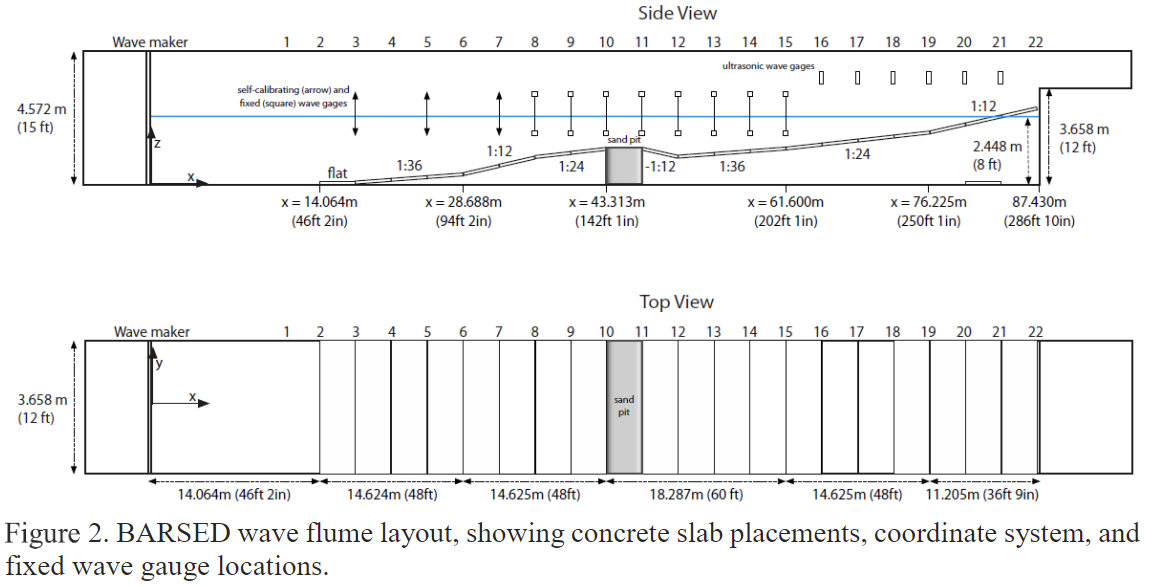

In [4]:
# Load the .mat file
bathy_dict = scipy.io.loadmat(bathy_file_path)

display(bathy_dict.keys())

# Get the bathymetry data
bathy_df = pd.DataFrame(bathy_dict["bathy"], columns = ["x_loc", "z_loc"])

display(bathy_df)

dict_keys(['__header__', '__version__', '__globals__', 'bathy'])

,x_loc,z_loc
0,14.064,0.000
1,14.064,0.152
2,17.724,0.152
3,21.381,0.330
4,25.034,0.432
5,28.688,0.533
6,32.339,0.837
7,35.996,1.142
8,39.655,1.295
9,43.313,1.447


In [5]:
# Python starts counting at 0
start_pit_index = 10 -1 
end_pit_index = 11 - 1

start_pit_x = bathy_df["x_loc"][start_pit_index]
end_pit_x   = bathy_df["x_loc"][end_pit_index]

# Calc the length of the pit in the x-direction
pit_length = end_pit_x - start_pit_x 

# Start and end of the sand pit
print("x - Start of the pit: {}".format(start_pit_index))
print("x - End of the pit: {}".format(end_pit_index))
print("Difference: {:.3f}".format(pit_length))

x - Start of the pit: 9
x - End of the pit: 10
Difference: 3.659


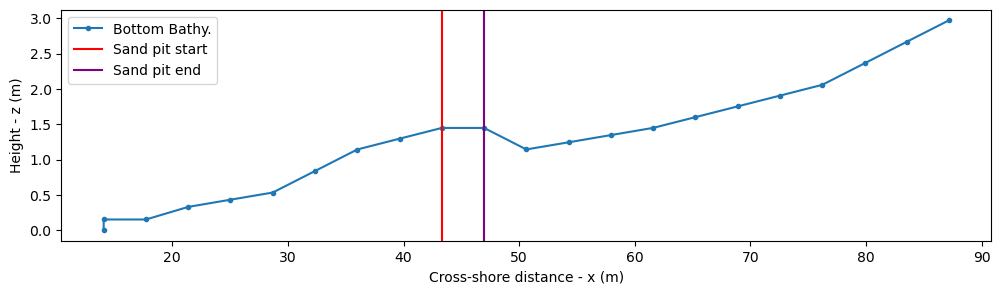

In [6]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 3))
# Plot the bathymetry for the experiments
axs.plot(bathy_df["x_loc"], bathy_df["z_loc"], marker = ".", label = "Bottom Bathy.")

# Add the location of the sand pit
axs.axvline(start_pit_x,  color = "red", label = "Sand pit start")
axs.axvline(end_pit_x, color = "purple", label = "Sand pit end")

axs.set_xlabel("Cross-shore distance - x (m)")
axs.set_ylabel("Height - z (m)")

axs.legend()
plt.show()